# Exploratory Data Analysis (EDA) Notebook

In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

# Load cleaned data
data_path = './data/processed/cleaned_data.csv'
df = pd.read_csv(data_path)

In [10]:
country_coords_df = pd.read_csv('./data/external/average-latitude-longitude-countries.csv')

In [11]:
country_coords_df = country_coords_df.rename(columns={"Country": "Area"})
data = df.merge(country_coords_df, on="Area", how="inner")

In [12]:
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.Longitude, data.Latitude),
    crs="EPSG:4326"
)

In [13]:
gdf

,Area Code (M49),Area,Item Code (CPC),Item,Year,yield(tonnes),pestUse(kg/ha),tempChange(C),population,rainfall,agland,ISO 3166 Country Code,Latitude,Longitude,geometry
0,0,Afghanistan,0,Potatoes,1961-01-01,-0.170644,0.000000,1.655833,-0.214929,-0.995747,0.079502,AF,33.0,65.0,POINT (65 33)
1,0,Afghanistan,0,Potatoes,1961-01-01,-0.171898,0.000000,1.655833,-0.214929,-0.995747,0.079502,AF,33.0,65.0,POINT (65 33)
2,0,Afghanistan,0,Potatoes,1961-01-01,-0.147873,0.000000,1.655833,-0.214929,-0.995747,0.079502,AF,33.0,65.0,POINT (65 33)
3,0,Afghanistan,0,Wheat,1961-01-01,0.267951,0.000000,1.655833,-0.214929,-0.995747,0.079502,AF,33.0,65.0,POINT (65 33)
4,0,Afghanistan,0,Wheat,1961-01-01,-0.173412,0.000000,1.655833,-0.214929,-0.995747,0.079502,AF,33.0,65.0,POINT (65 33)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57486,0,Zimbabwe,0,Sorghum,2021-01-01,-0.173476,153022.097291,1.210167,-0.164269,-0.573859,-0.218484,ZW,-20.0,30.0,POINT (30 -20)
57487,0,Zimbabwe,0,Sorghum,2021-01-01,-0.148089,153022.097291,1.210167,-0.164269,-0.573859,-0.218484,ZW,-20.0,30.0,POINT (30 -20)
57488,0,Zimbabwe,0,Wheat,2021-01-01,-0.160460,153022.097291,1.210167,-0.164269,-0.573859,-0.218484,ZW,-20.0,30.0,POINT (30 -20)
57489,0,Zimbabwe,0,Wheat,2021-01-01,-0.172609,153022.097291,1.210167,-0.164269,-0.573859,-0.218484,ZW,-20.0,30.0,POINT (30 -20)


In [ ]:
# # 1. Summary Statistics
# print("Summary statistics:")
# print(df.describe())

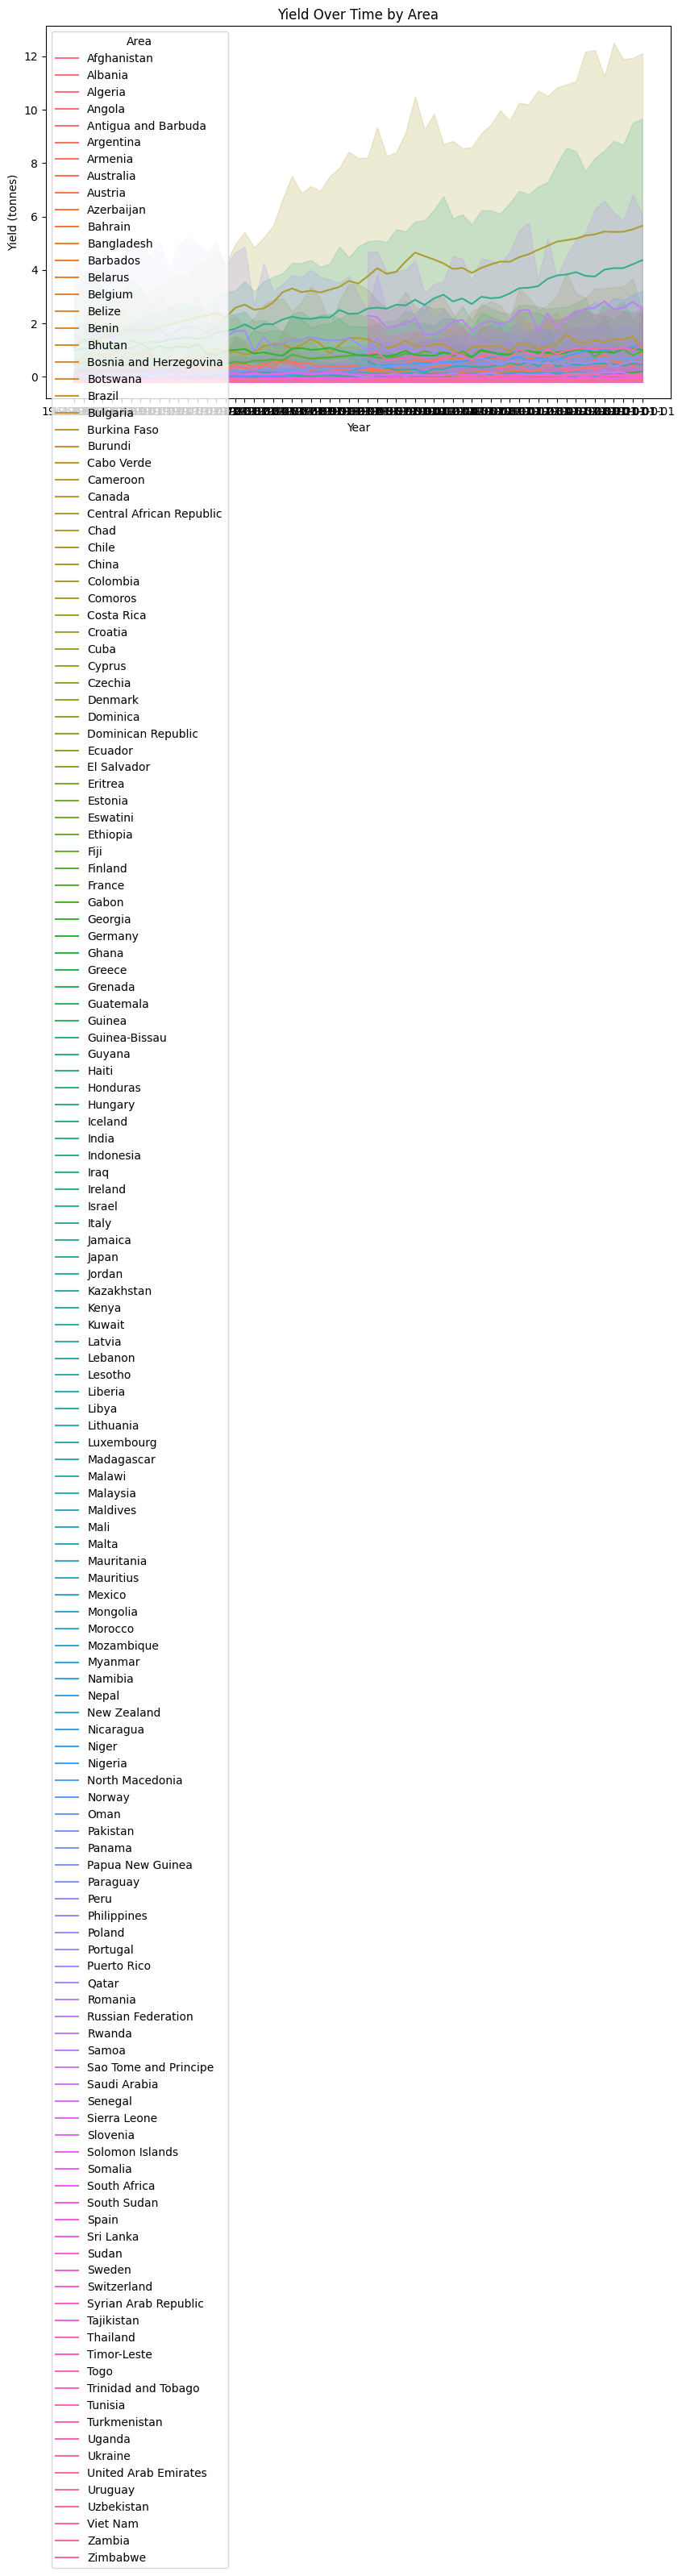

In [5]:
# 2. Yield over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='yield(tonnes)', hue='Area')
plt.title('Yield Over Time by Area')
plt.xlabel('Year')
plt.ylabel('Yield (tonnes)')
# plt.legend(loc='upper left')
plt.show()

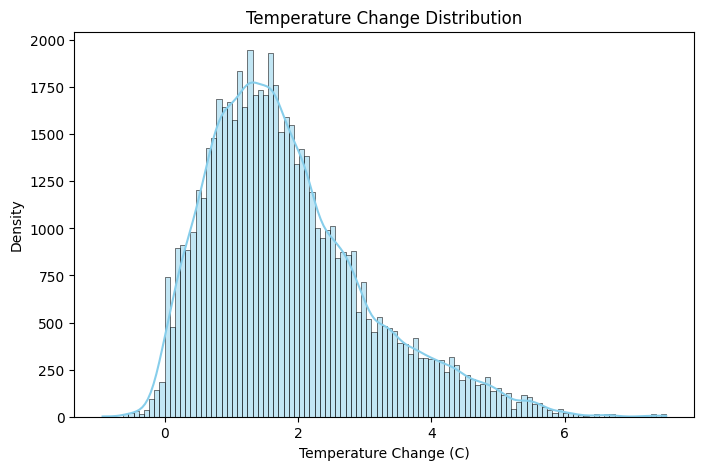

In [4]:
# 3. Temperature Change Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['tempChange(C)'], kde=True, color='skyblue')
plt.title('Temperature Change Distribution')
plt.xlabel('Temperature Change (C)')
plt.ylabel('Density')
plt.show()

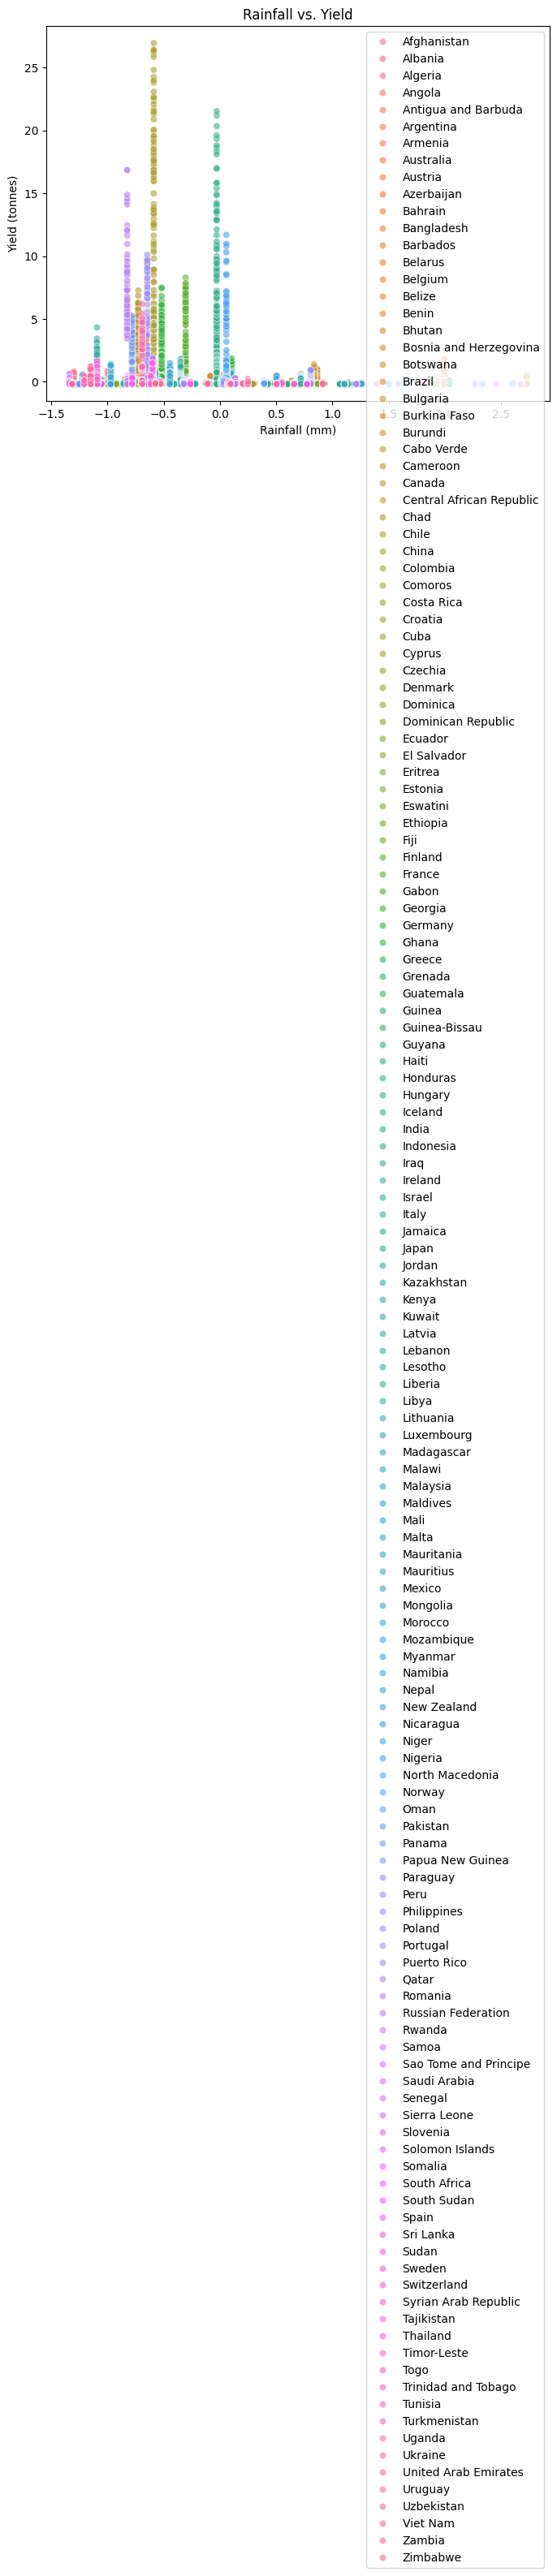

In [6]:
# 4. Rainfall vs. Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rainfall', y='yield(tonnes)', hue='Area', alpha=0.6)
plt.title('Rainfall vs. Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (tonnes)')
plt.legend(loc='upper right')
plt.show()

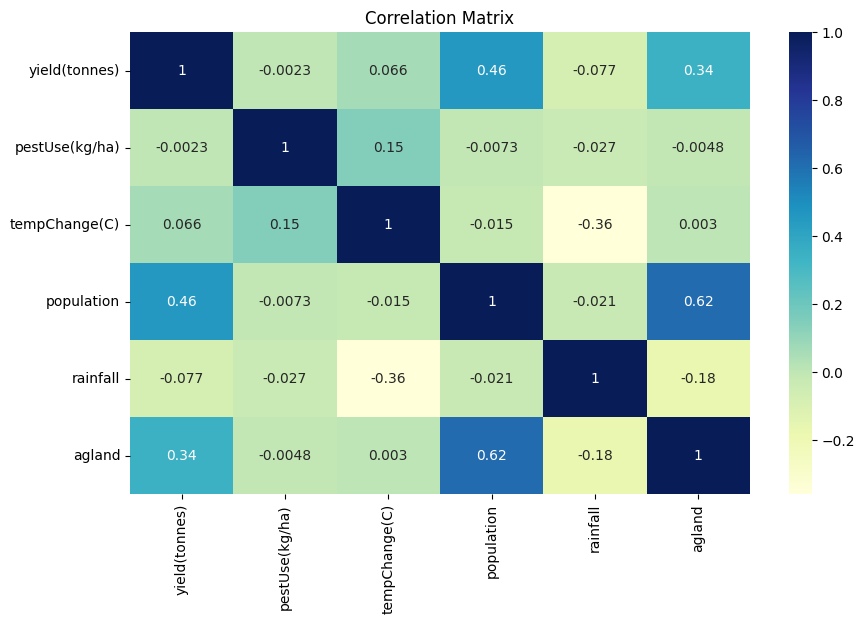

In [7]:
# 5. Correlation Analysis
# Heatmap of correlations between numerical variables
correlation_matrix = df[['yield(tonnes)', 'pestUse(kg/ha)', 'tempChange(C)', 'population', 'rainfall', 'agland']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Filter out rows with non-positive or missing population values
gdf = gdf[gdf['population'] > 0].dropna(subset=['population', 'Latitude', 'Longitude'])

In [15]:
fig = px.scatter_geo(
    gdf,
    lat='Latitude',
    lon='Longitude',
    color='yield(tonnes)',
    size='population',
    hover_name='Area',
    title='Yield Distribution by Country',
    projection='natural earth'
)

In [17]:
fig.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="natural earth")

In [ ]:
fig.write_image("./data/output/yield_distribution.png")

In [18]:
gdf.to_csv('./data/processed/geo_df.csv', index=False)